<a href="https://colab.research.google.com/github/johhan27/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/March22_DS_421_Architect_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras and a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. 

### Objective

- Build a baseline classification model then, run a few experiments with different optimizers and learning rates. 
- Don't forget to [**switch to GPU if you're running your notebook on Colab!**](https://colab.research.google.com/notebooks/gpu.ipynb)

## Load Your Data

In [2]:
# imports in first cell 
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# use Sequential to build out your model
from tensorflow.keras.models import Sequential

# Dense layer is used for Fully Connected Forward Feeding networks
from tensorflow.keras.layers import Dense

Note that the 28x28 quickdraw images have already been "flattened" into 784: dimensional vectors

In [3]:
# load the quickdraw data set
!git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks
data = np.load('/content/DS-Unit-4-Sprint-2-Neural-Networks/quickdraw10.npz')

X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

Cloning into 'DS-Unit-4-Sprint-2-Neural-Networks'...
remote: Enumerating objects: 505, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 505 (delta 73), reused 95 (delta 48), pack-reused 364
Receiving objects: 100% (505/505), 83.68 MiB | 23.41 MiB/s, done.
Resolving deltas: 100% (257/257), done.
(100000, 784)
(100000,)


These are the names of the 10 image classes

In [4]:
class_names = ['apple',
             'anvil',
             'airplane',
             'banana',
             'The Eiffel Tower',
             'The Mona Lisa',
             'The Great Wall of China',
             'alarm clock',
             'ant',
             'asparagus']

We can explore the data a bit by reshaping the vectors back to images and displaying them with their labels. <br>
Turns out the data has 10 blocks of 10,000 images of each of the above labels, in order. <br>
So the code below displays the first image of each class.

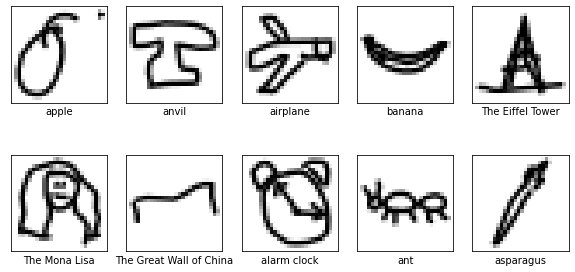

In [5]:
# these are your 10 unique images
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28),cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

Say hello to the Quickdraw dataset!

You'll be using this dataset a lot this week as an alternative to the MNIST digits data set, which we'll use in the guided projects. The nice thing about this dataset is that it's simple, which allows us to focus on our model, its various components, and gradually come to a better understanding of how to build neural networks without worrying about cleaning and prepping our image data much.

In [6]:
# always a good idea to shuffle your dataset!
X, y = shuffle(X, y)

-----

## Build Your Baseline Model

Make sure that you

- **Determine** the dimensionality of your input data by investigating **X**
- **Normalize** your input data to values between 0 and 1 
- **Determine** the number of neurons in your output layer by investigating **Y**
- **Select** `sparse_categorical_crossentropy` as your loss function.
- **Select** `sgd` as your optimizer.
- **Add** 3 hidden layers to your model with the following number of nodes
    - h1 has 500 nodes
    - h2 has 250 nodes
    - h3 has 100 nodes
    
- **Set** epochs to 20 
- **Use** the `validation_split` keyword in `model.fit()` to automatically create a training / validation dataset from within the model. Specify a percentage, such as `validation_split = 0.2`
 
Not sure what the various parameters are for or what values to assign to them?

- Reference the guided project notebook for Sprint 2 Module 1
- Reference the [**Keras documentation**](https://keras.io/api/)
- Google other examples
- Discuss your results with classmates 

In [7]:
X.shape, len(np.unique(y))

((100000, 784), 10)

In [8]:
# get dim of image row vectors and save to input_dim

input_dim = 784

# get number of unique labels and save to n_output_labels

n_output_labels = 10

# normalize image data to values between 0 and 1 (by dividing by max pixel value)

max_value = 255 #MAX PIXEL VALUE

X_scaled = X.astype('float32') / max_value


# YOUR CODE HERE
#raise NotImplementedError()

In [9]:
# a check on your data prep 
assert  X_scaled.max(), "Max pixel value should be 1.0, make sure you normalize your data"

In [10]:
# instantiate a sequential object and call it model, then add the layers to your model

model = Sequential()

model.add(Dense(500, activation='relu', input_dim=input_dim))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))


# add a compile layer but don't fit your model yet 

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# YOUR CODE HERE
#raise NotImplementedError()

In [11]:
# a check on your model architecture 
n_layers = len(model.get_config()["layers"])
assert n_layers == 5, "You should have 5 layers: input, h1, h2, h3, and output"

In [12]:
# check out your model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 100)               25100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [14]:
# fit your model and save training results to history 
epochs = 20
history = model.fit(X_scaled, y, 
                    epochs=epochs, 
                    # a held-out validation set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 13s 4ms/step - loss: 0.9707 - accuracy: 0.7125 - val_loss: 0.7224 - val_accuracy: 0.7904
Epoch 2/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6575 - accuracy: 0.8071 - val_loss: 0.6101 - val_accuracy: 0.8199
Epoch 3/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5599 - accuracy: 0.8336 - val_loss: 0.5434 - val_accuracy: 0.8400
Epoch 4/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.4980 - accuracy: 0.8518 - val_loss: 0.5129 - val_accuracy: 0.8465
Epoch 5/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.4524 - accuracy: 0.8659 - val_loss: 0.4853 - val_accuracy: 0.8551
Epoch 6/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.4150 - accuracy: 0.8778 - val_loss: 0.4710 - val_accuracy: 0.8615
Epoch 7/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.3827 - accuracy: 0.8873 - val_loss: 0.4544 - val_ac

----
### Visualize the Results

- Move results in `history` to a dataframe. 
- Use [**Seaborn**](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to create line plots for both loss and accuracy by epoch. 
- Analyze the results and write a couple of observations. 

At what point should we have stopped training the model and why? 

In [15]:
df = pd.DataFrame.from_dict(history.history).astype('float32')

In [17]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.970674,0.712475,0.722365,0.79045
1,0.657528,0.807100,0.610069,0.81985
2,0.559936,0.833588,0.543392,0.84000
3,0.498037,0.851850,0.512857,0.84655
4,0.452449,0.865875,0.485326,0.85510


In [18]:
# YOUR CODE HERE
#raise NotImplementedError()

In [19]:
# a check on our model training
assert df.shape[0] == 20, "df should have the training results from 20 epochs"

In [20]:
len(df.index)

20

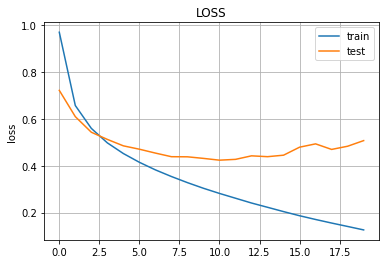

In [29]:
# use seaborn to plot loss and accuracy metrics
import seaborn as sns 
import matplotlib.pyplot as plt

#epochs_arr = [ i for i in range(len(df))]

sns.lineplot(x=df.index, y=df['loss'], label = 'train')
sns.lineplot(x=df.index, y=df['val_loss'], label = 'test')
plt.title('LOSS')
plt.grid()

# YOUR CODE HERE
#raise NotImplementedError()

### Observations 

Based on the plot of the training and validation loss, answer the following questions. 

**Was our model able to learn throughout the 20 epochs? Why or why not?**

Yes, our model was able to learn through epochs though not all of them were necessary 

**Is our model overfitting? Why or why not?**

No, our model is not overfitting since the loss curve on the test set doesn't get closer to 0 as the training set

**Could the model score benefit from additional epochs? Why or why not?**

No, since we see that after the 7th-10th epoch the loss curve does not change significantly 

-----
## Change Optimizers

Let's compare model performance between different optimizers. 
- Build a new model, identical to the last one but using `adam` for the optimizer. 
- Train (fit) the model
- Save the modeling results to adam_history, so we don't erase the results from the previous model run
- Visualize the training results just as we did for the last model. 


In [22]:
# train the same model as above but use the sgd optimizer if you used adam previously (or use adam if you used sgd previously)

# YOUR CODE HERE

model = Sequential()

model.add(Dense(500, activation='relu', input_dim=input_dim))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 20

adam_history = model.fit(X_scaled, y,
                         epochs=epochs,
                         validation_split = 0.2)



#raise NotImplementedError()

Epoch 1/20
2500/2500 [==============================] - 11s 4ms/step - loss: 0.5982 - accuracy: 0.8162 - val_loss: 0.4775 - val_accuracy: 0.8565
Epoch 2/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.4164 - accuracy: 0.8729 - val_loss: 0.4300 - val_accuracy: 0.8706
Epoch 3/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.3462 - accuracy: 0.8941 - val_loss: 0.4137 - val_accuracy: 0.8765
Epoch 4/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2936 - accuracy: 0.9093 - val_loss: 0.4423 - val_accuracy: 0.8737
Epoch 5/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2477 - accuracy: 0.9222 - val_loss: 0.4382 - val_accuracy: 0.8819
Epoch 6/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2149 - accuracy: 0.9324 - val_loss: 0.4519 - val_accuracy: 0.8803
Epoch 7/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1861 - accuracy: 0.9403 - val_loss: 0.4768 - val_ac

In [23]:
# a check that we're using the correct optimizer in this model
opt_name = model.optimizer.get_config()["name"]
assert opt_name == "Adam", "you need to use adam for the optimizer in this model."

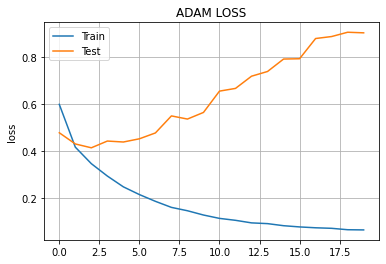

In [27]:
# YOUR CODE HERE

df_adam = pd.DataFrame.from_dict(adam_history.history).astype('float32')

sns.lineplot(x=df_adam.index, y=df_adam['loss'], label="Train")
sns.lineplot(x=df_adam.index, y= df_adam['val_loss'], label="Test")
plt.title("ADAM LOSS")
plt.grid()


#raise NotImplementedError()

### Observations 

This plot should look very different from the previous plot. Based on the plot of the training and validation loss, answer the following questions. 

**Is our model overfitting? Why or why not?**

Yes, it is overfitting because the val_loss in incrementing at each epoch and the val_accuracy remains the same 

**Could our model's performance improve by training on more than 20 epochs? Why or why not?**

No, it could not improve by adding epoch since the trend is imminently to a higher loss at each epoch 

**Assuming that you want to stick to this model architecture, what can you do to avoid overfitting?**

Stop at the second epoch where the val_loss decreases a little.

------
# Conclusion 

You have observed by comparing the two models that are identical except for the optimizer, that the choice of the optimizer can considerably influence the performance of a neural network. 

You might not know 

- why changing the optimizer from Stochastic Gradient Descent over to Adam made a difference.
- how Gradient Descent works 
- or that Adam is known as Adaptive Gradient Descent (i.e., is it a different version of ordinary Gradient Descent). 

But that's ok - tomorrow's lesson will be a deep dive into Gradient Descent. You'll learn the theory of Gradient Descent, we'll code up Gradient Descent from scratch, and we'll talk about how Adam is different from ordinary Gradient Descent. 

-----
# Preparation for Tomorrow 

In preparation for tomorrow, you might need to watch a few videos. I say it might because you may or may not already be comfortable with multi-variate calculus. 

### Theory of Calculus 
The theory of Gradient Descent rests on [**the derivative from Calculus**](https://www.youtube.com/watch?v=WUvTyaaNkzM). If you've never taken a Calculus course before, or are a bit rusty, definitely watch this video in preparation for tomorrow's lesson. The takeaway here is to understand the derivative conceptually; you won't be asked to calculate any derivatives by hand. 

### The Gradient - a Multi-Dimensional Derivative
Once you've watched the previous video, you will be ready to understand how to conceptualize a derivative in an N-dimensional space (where N is any number ranging from 2, 3, 4, ..., all the way to a very large number of dimensions N ). [**This video visually explains the multi-dimensional derivative called the Gradient visually**](https://www.youtube.com/watch?v=GkB4vW16QHI) - and that's the takeaway. The point of this video is to help you understand the Gradient visually using 3D surfaces. You should also know that the Gradient is made up of partial derivatives, more on this tomorrow. 

### Contour Maps 
It is very common to visual 3D surfaces as 2D contour maps - and we'll be making a lot of use of contour maps to understand Gradient Descent. Watch this video to [**understand the relationship between 3D surfaces and 2D contour maps.**](https://www.youtube.com/watch?v=acdX4YamDtU)

### The Calculus of Backpropagation 

Unlike standard Sklearn ML models, neural networks use Gradient Descent and something called Backpropagatin to learn from the data. [**In order to understand how backpropagation works, you need to understand the Chain Rule in Calculus**](https://www.youtube.com/watch?v=acdX4YamDtU). The takeaway here is to understand how a partial derivative can be decomposed into a product of multiple derivatives. 

------
# Stretch Goals

### This Section is Optional!

Only after you've completed the above work and watched the recommended videos are you then encouraged to experiment with building a few more models and analyze their results. 

Here are some suggestions to help you get started. 

- Train the same model using the Sigmoid and Relu activation functions and note the difference in their learning outcomes. [**Keras docs on activation functions**](https://keras.io/api/layers/activations/). We'll cover the Relu activation function in Sprint 2 Module 3.
- Train the same model using normalized and non-normalized data and note the difference in their learning outcomes. 


The objective here is to get more practice with the Keras API (i.e., building models) and run a couple of experiments to help set you up for future lessons. In order words, we'll be discussing different activation functions and the effect of normalized data on model training.